# California Housing Dataset

---

## Objective
The objective of this notebook is to explore the California Housing dataset in order to understand distributions, relationships, spatial patterns, and potential data issues that may affect modeling.

This notebook focuses on identifying insights and validating assumptions defined in the dataset understanding stage.

---

## 1. Data Loading and Initial Inspection
**Tasks**
- Load the dataset.
- Check the number of rows and columns.
- Check the name of each column.
- Inspect the first and last records.

**What to observe**
- Confirm that each row represents a district.
- Verify that all expected columns are present.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, probplot, skew

In [2]:
df_housing = pd.read_csv("/home/trazeure/Notebooks/House_pricing/Data/housing.csv")

In [3]:
print(f"Number of rows:\n{df_housing.shape[0]}")
print(f"Number of columns:\n{df_housing.shape[1]}")

Number of rows:
20640
Number of columns:
10


In [4]:
print(f"Column names of the data set:\n{df_housing.columns}")

Column names of the data set:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [5]:
print(f"Last record of the data frame:\n{df_housing.iloc[0]}")

Last record of the data frame:
longitude              -122.23
latitude                 37.88
housing_median_age        41.0
total_rooms              880.0
total_bedrooms           129.0
population               322.0
households               126.0
median_income           8.3252
median_house_value    452600.0
ocean_proximity       NEAR BAY
Name: 0, dtype: object


In [6]:
print(f"First record of the data frame:\n{df_housing.iloc[-1]}")

First record of the data frame:
longitude             -121.24
latitude                39.37
housing_median_age       16.0
total_rooms            2785.0
total_bedrooms          616.0
population             1387.0
households              530.0
median_income          2.3886
median_house_value    89400.0
ocean_proximity        INLAND
Name: 20639, dtype: object


In [7]:
print(f"First 5 columns of the data frame:\n{df_housing.head()}")

First 5 columns of the data frame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## 2. Data Types and Missing Values
**Tasks**
- Identify data types of all features.
- Detect missing values per column.
- Calculate the percentage of missing data.

**What to observe**
- Columns with missing values (especially `total_bedrooms`).
- Whether missing values appear random or systematic.


In [8]:
print("Data type of each feature:")
df_housing.info()

Data type of each feature:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
print("Percentage of missing data:")
missing_percentage_per_column = df_housing.isnull().mean() * 100
print(missing_percentage_per_column)

Percentage of missing data:
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [10]:
median_bedrooms = df_housing["total_bedrooms"].median()
df_housing["total_bedrooms"] = df_housing["total_bedrooms"].fillna(median_bedrooms)

In [11]:
print("Percentage of missing data after filling values of total_bedrooms:")
missing_percentage_per_column = df_housing.isnull().mean() * 100
print(missing_percentage_per_column)

Percentage of missing data after filling values of total_bedrooms:
longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64


## 3. Target Variable Analysis: `median_house_value`
**Tasks**
- Analyze the distribution of the target variable.
- Identify skewness and potential capping.
- Compare mean vs median.

**What to observe**
- Right-skewed distribution.
- Presence of a maximum cap value.
- Outliers at high values.

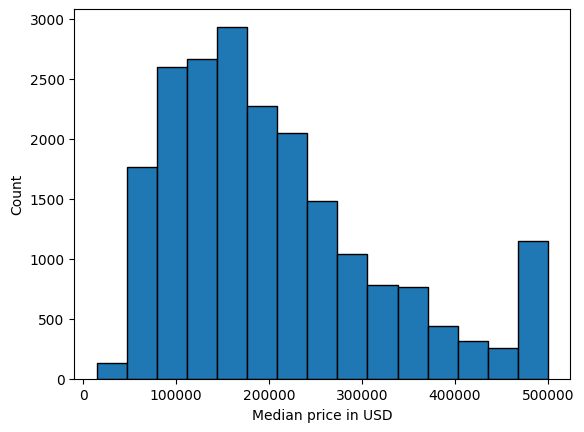

In [12]:
plt.hist(df_housing["median_house_value"], bins=15, edgecolor="black")
plt.xlabel("Median price in USD")
plt.ylabel("Count")
plt.show()

In [13]:
# Calculate skewness and kurtosis
median_house_value = df_housing["median_house_value"]

summary = pd.DataFrame(
    {
        "Skewness": [skew(median_house_value)],
        "Excess Kurtosis": [kurtosis(median_house_value)],
    },
    index=["median_house_value"],
)

summary

,Skewness,Excess Kurtosis
median_house_value,0.977692,0.3275


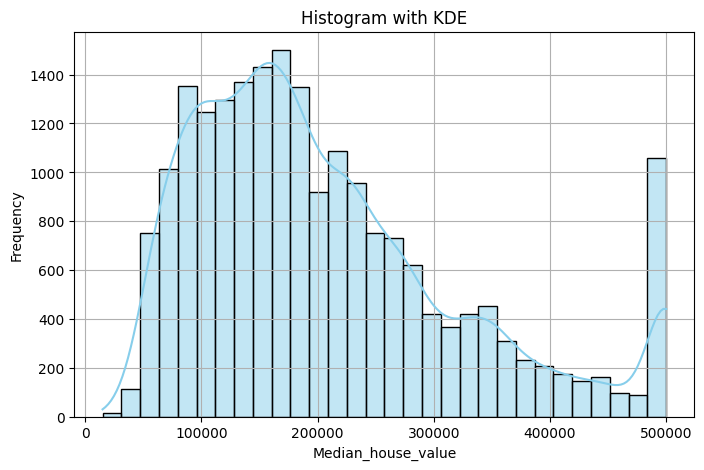

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(median_house_value, kde=True, bins=30, color="skyblue")
plt.title(f"Histogram with KDE")
plt.xlabel("Median_house_value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

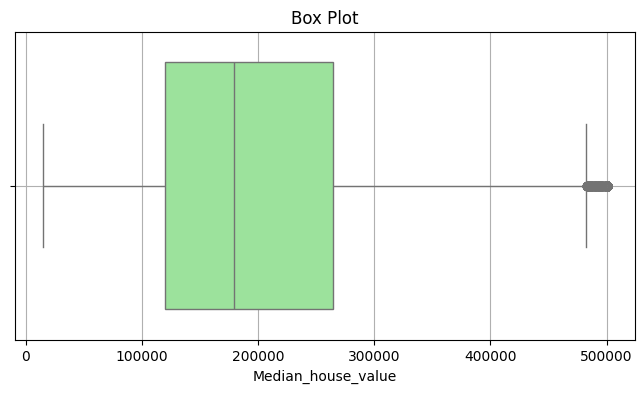

In [15]:
# Plot box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=median_house_value, color="lightgreen")
plt.title("Box Plot")
plt.xlabel("Median_house_value")
plt.grid(True)
plt.show()

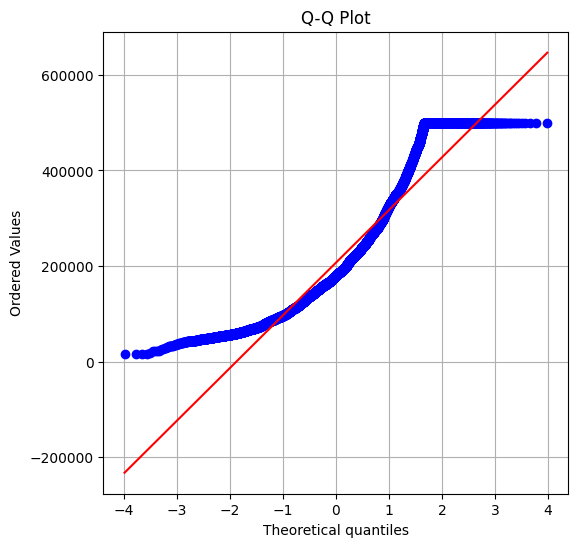

In [16]:
# Q-Q plot to check normality
plt.figure(figsize=(6, 6))
probplot(median_house_value, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(True)
plt.show()

In [17]:
mean_median = pd.DataFrame(
    {"mean": [median_house_value.mean()], "median": [median_house_value.median()]},
    index=["median_house_value"],
)
mean_median

,mean,median
median_house_value,206855.816909,179700.0


## 4. Univariate Analysis of Numerical Features
**Tasks**
- Analyze distributions of numerical variables.
- Identify outliers and unusual values.
- Observe scale differences across features.

**What to observe**
- Long-tailed distributions in room and population features.
- Features with very different ranges.

In [18]:
# Distributions
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


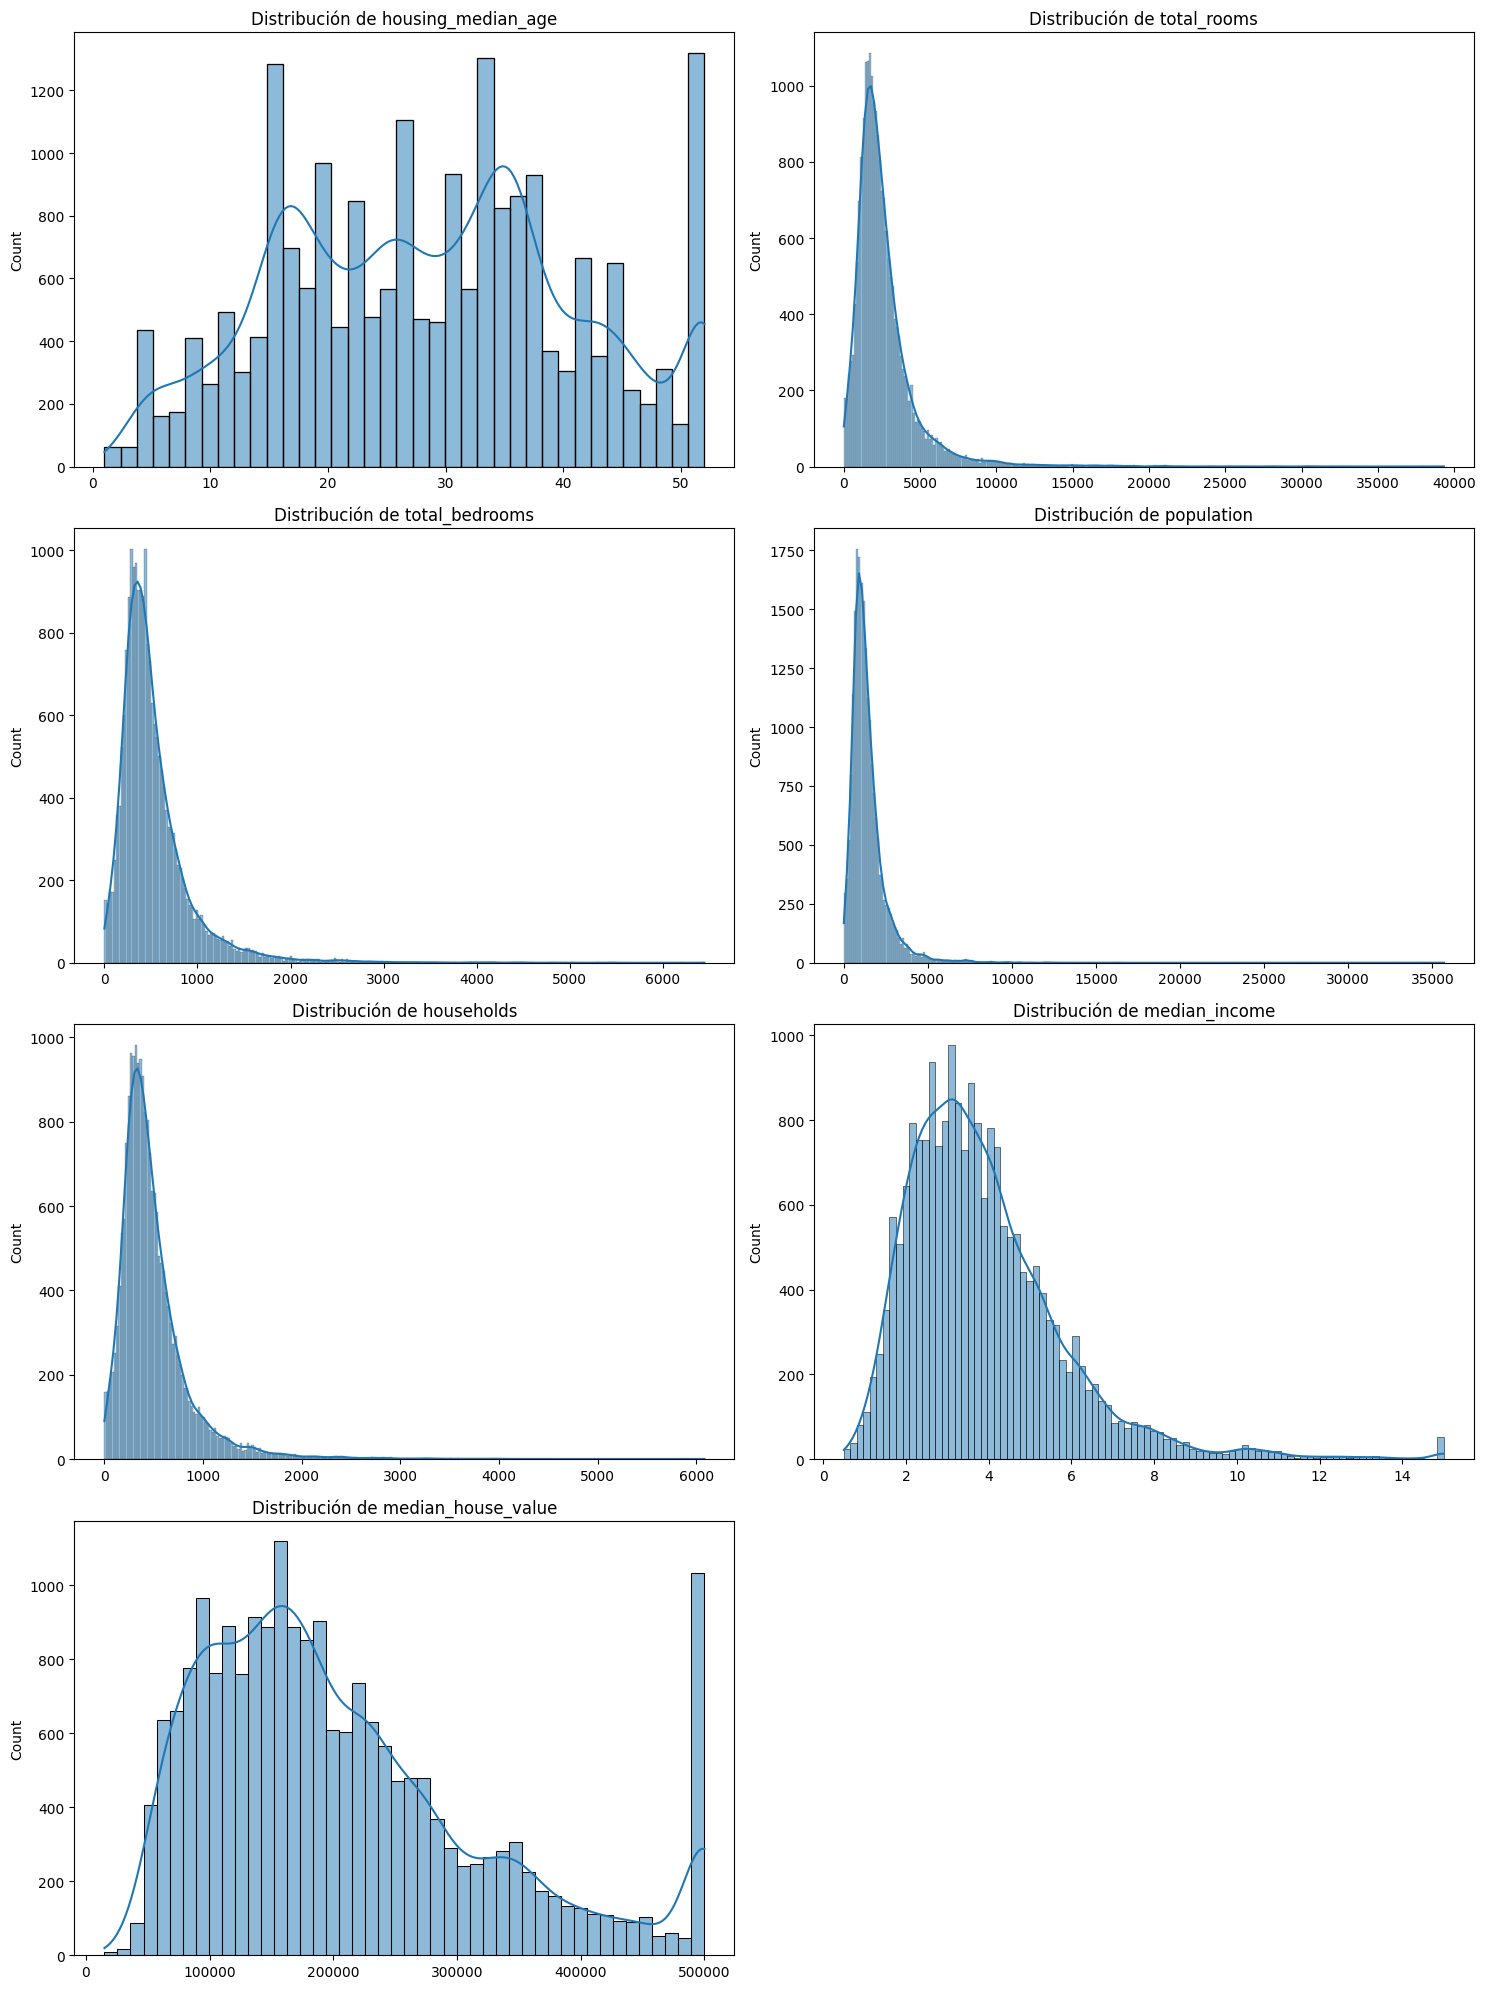

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value",
]


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flat

for i, col in enumerate(cols):
    sns.histplot(df_housing[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("")

if len(cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

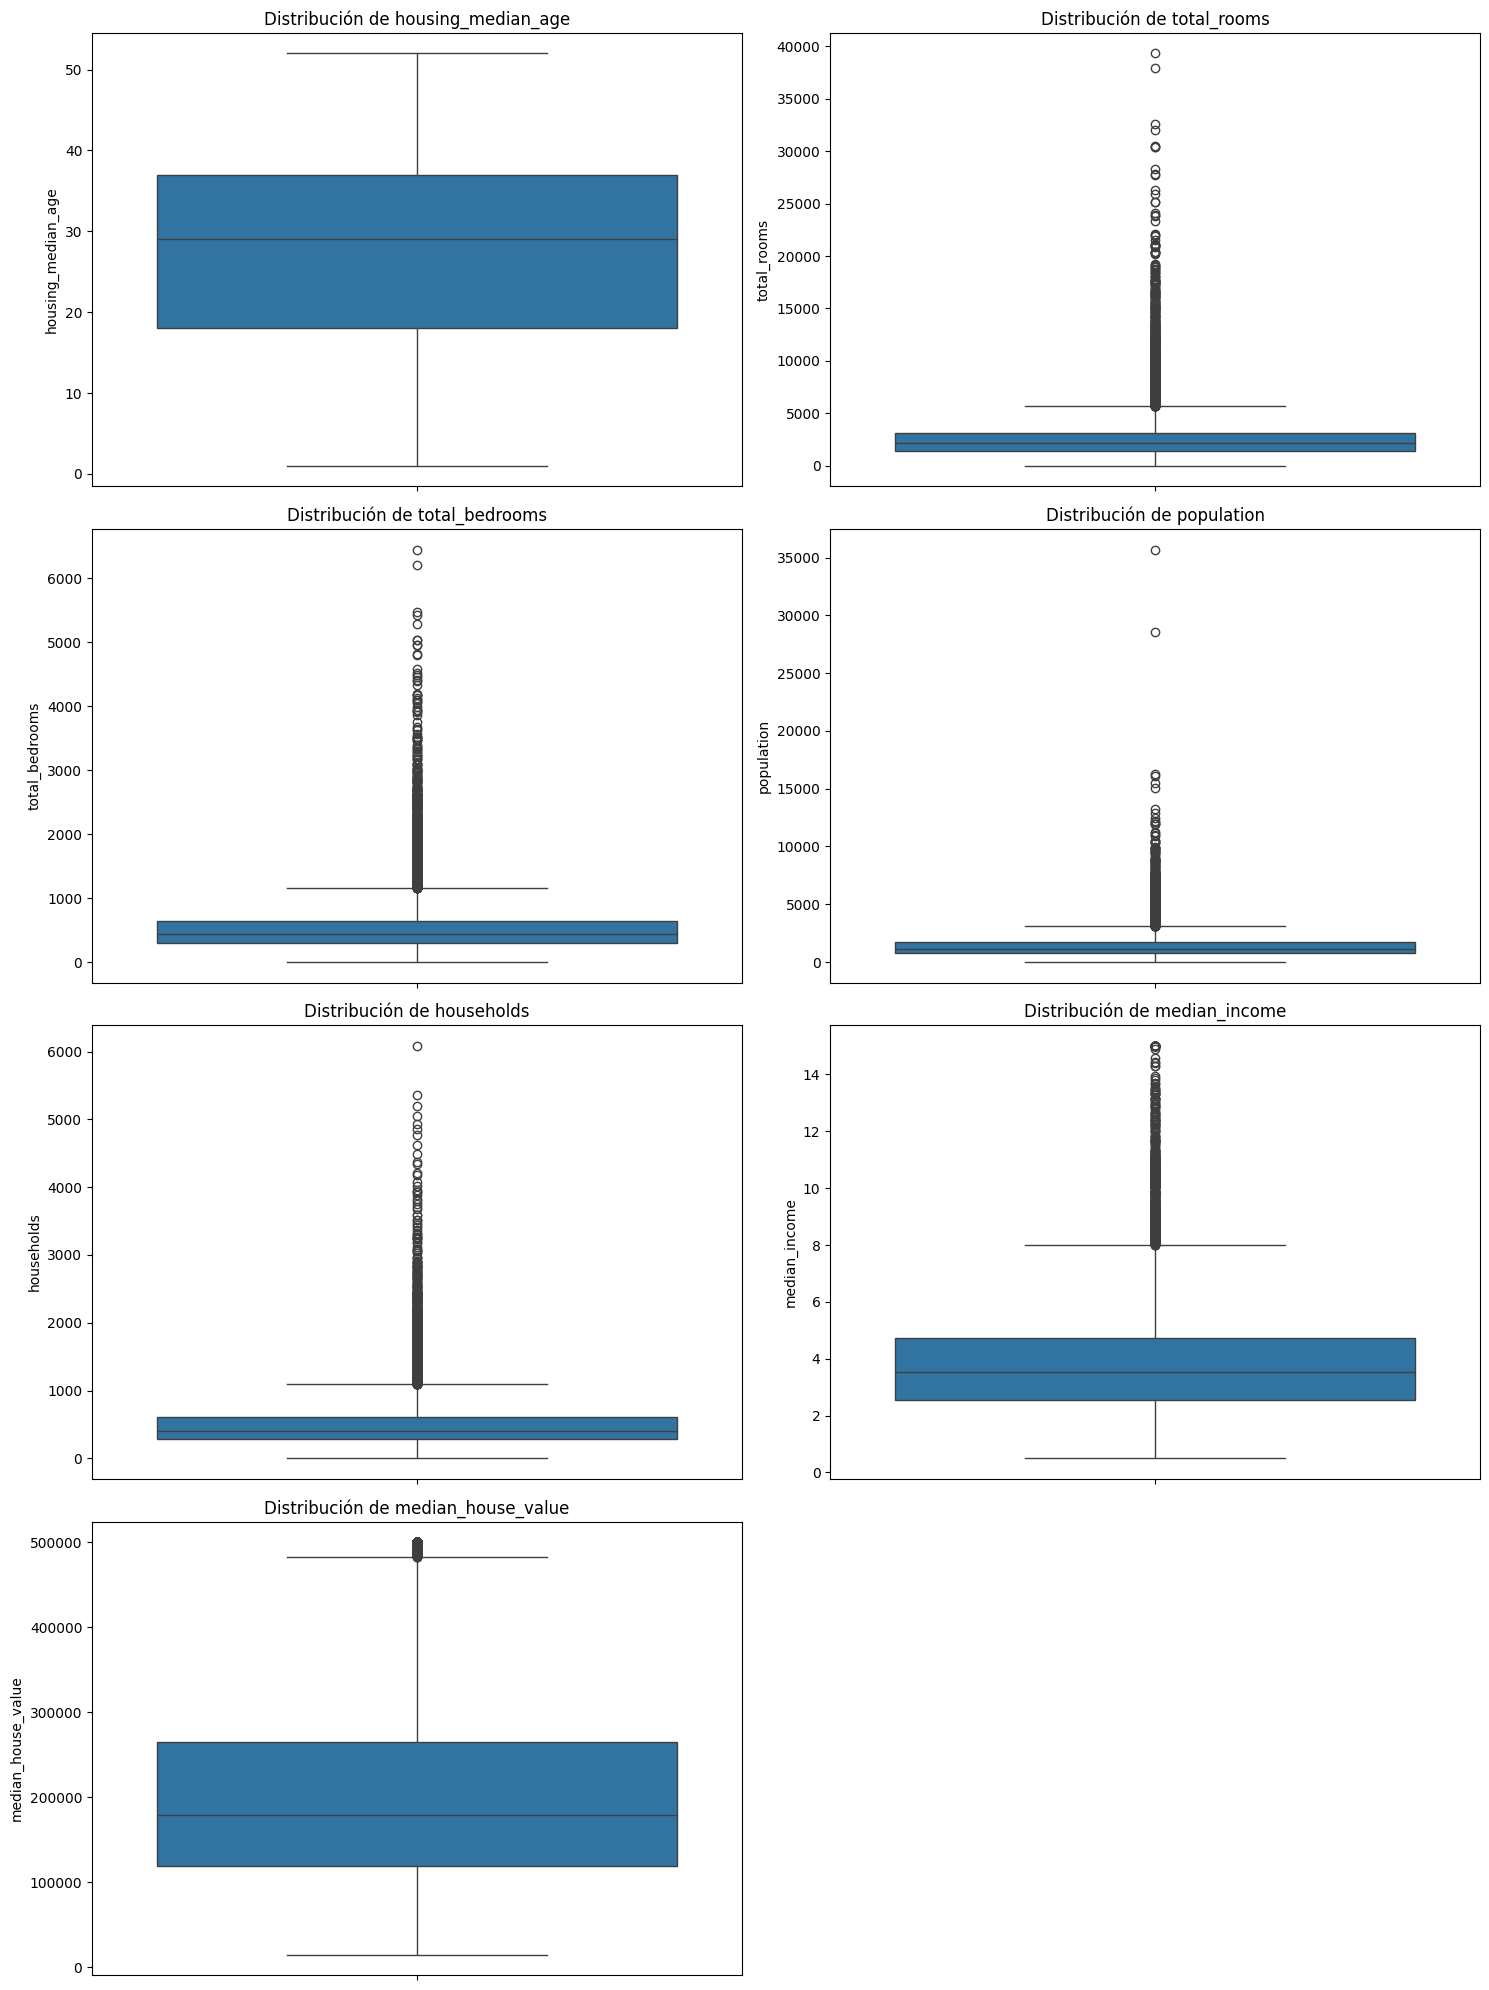

In [22]:
cols = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value",
]


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flat

for i, col in enumerate(cols):
    sns.boxplot(df_housing[col], ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("")

if len(cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

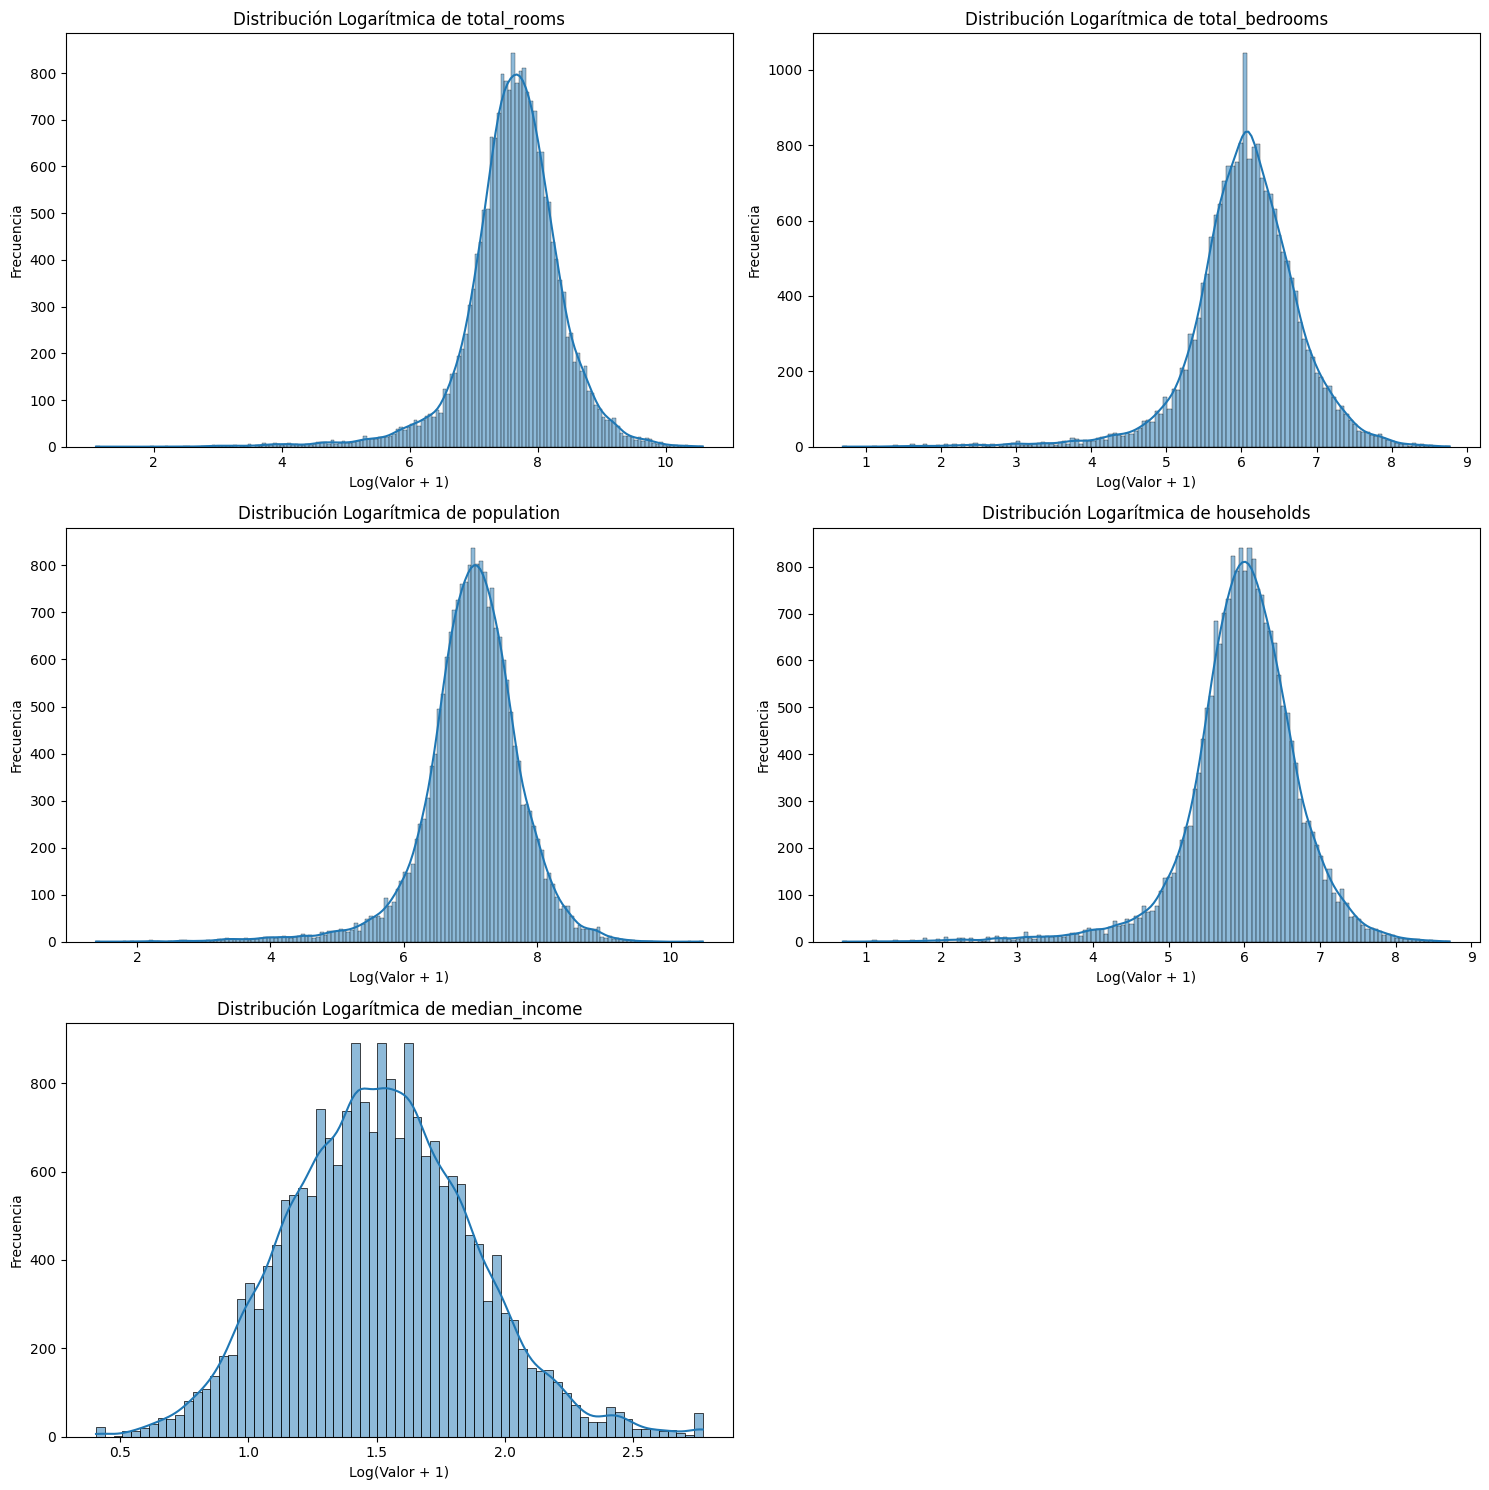

In [27]:
# 1. Asegúrate de que el nombre de la lista sea consistente
cols_distribution = [
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
]

# 2. Configuramos los subplots (ajusté a 3x2 para que quepan bien las 5 variables)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flat

for i, col in enumerate(cols_distribution):
    # CORRECCIÓN: Aplicamos log1p solo a la columna actual 'col'
    sns.histplot(np.log1p(df_housing[col]), ax=axes[i], kde=True)

    axes[i].set_title(f"Distribución Logarítmica de {col}")
    axes[i].set_xlabel("Log(Valor + 1)")
    axes[i].set_ylabel("Frecuencia")

# 3. Eliminar ejes sobrantes (si hay 5 variables y 6 espacios)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Resumen Estadístico:
       housing_median_age   total_rooms  total_bedrooms    population  \
count        20640.000000  20640.000000    20640.000000  20640.000000   
mean            28.639486   2635.763081      536.838857   1425.476744   
std             12.585558   2181.615252      419.391878   1132.462122   
min              1.000000      2.000000        1.000000      3.000000   
25%             18.000000   1447.750000      297.000000    787.000000   
50%             29.000000   2127.000000      435.000000   1166.000000   
75%             37.000000   3148.000000      643.250000   1725.000000   
max             52.000000  39320.000000     6445.000000  35682.000000   

         households  median_income  median_house_value  
count  20640.000000   20640.000000        20640.000000  
mean     499.539680       3.870671       206855.816909  
std      382.329753       1.899822       115395.615874  
min        1.000000       0.499900        14999.000000  
25%      280.000000       2.563400  

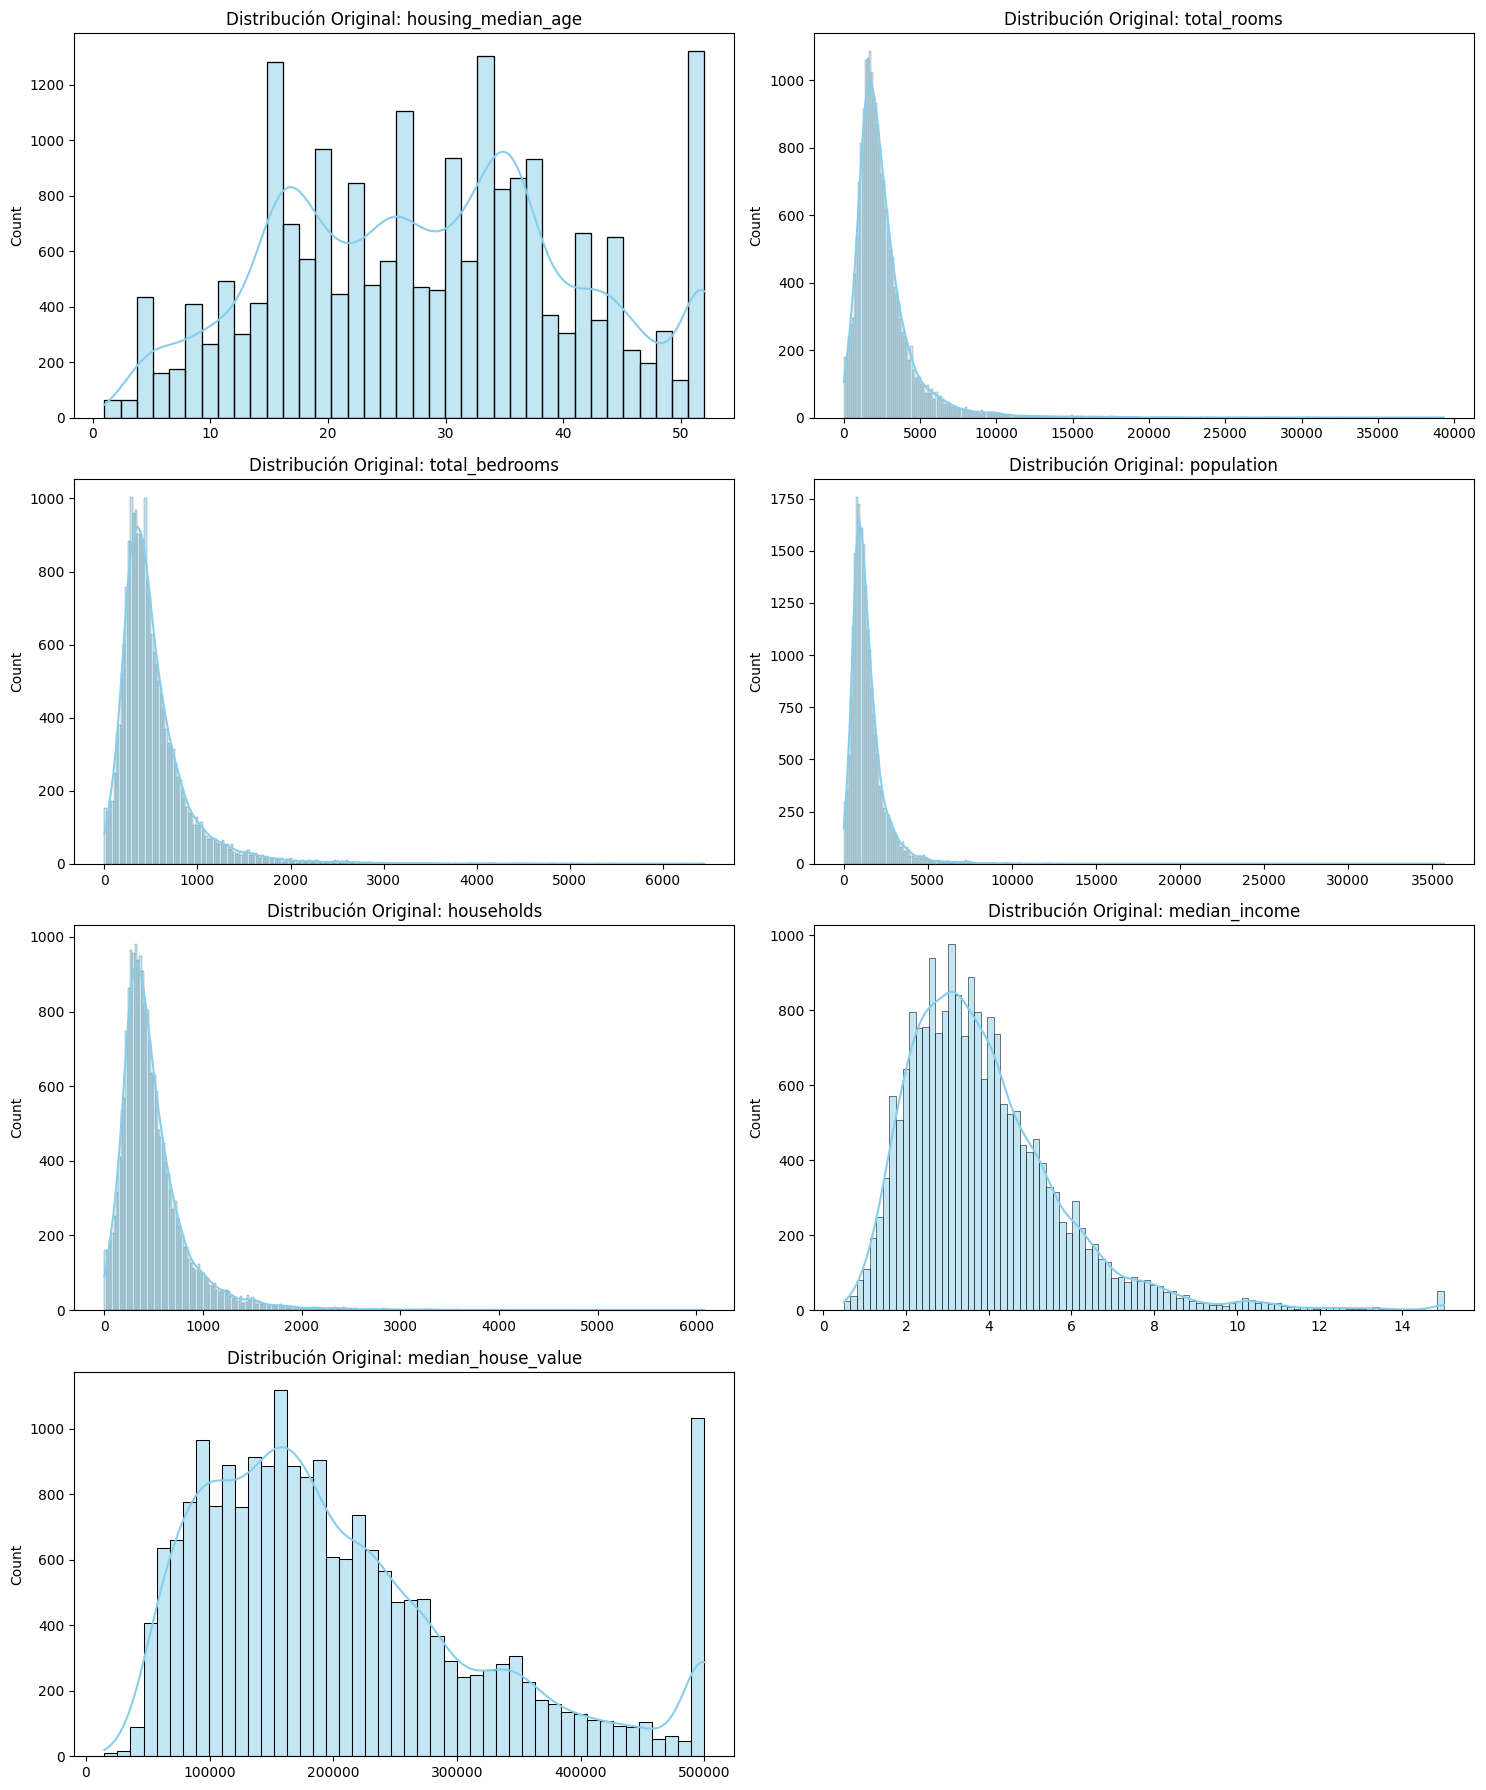

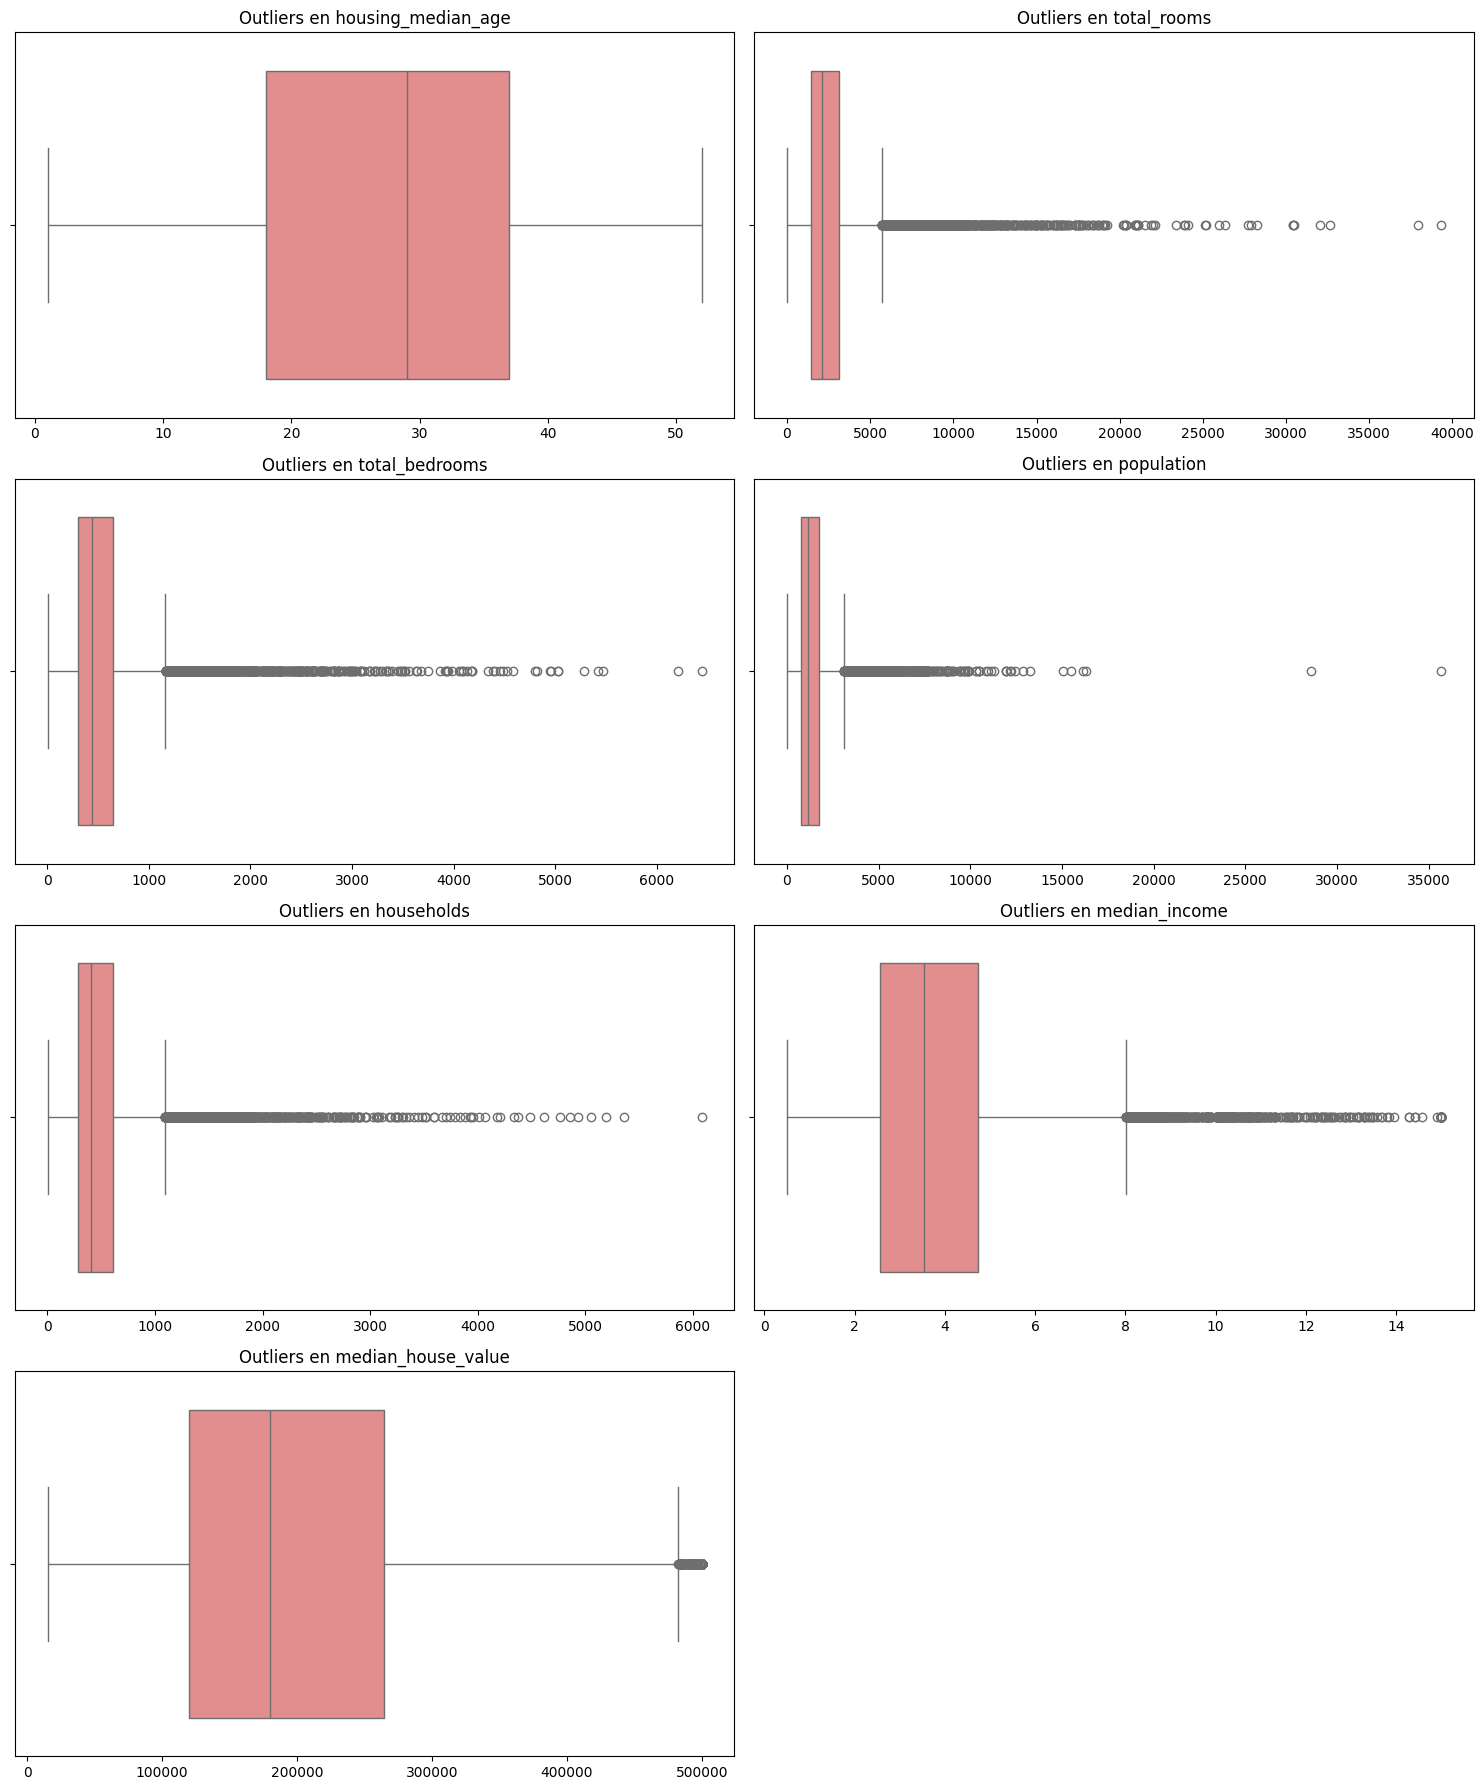

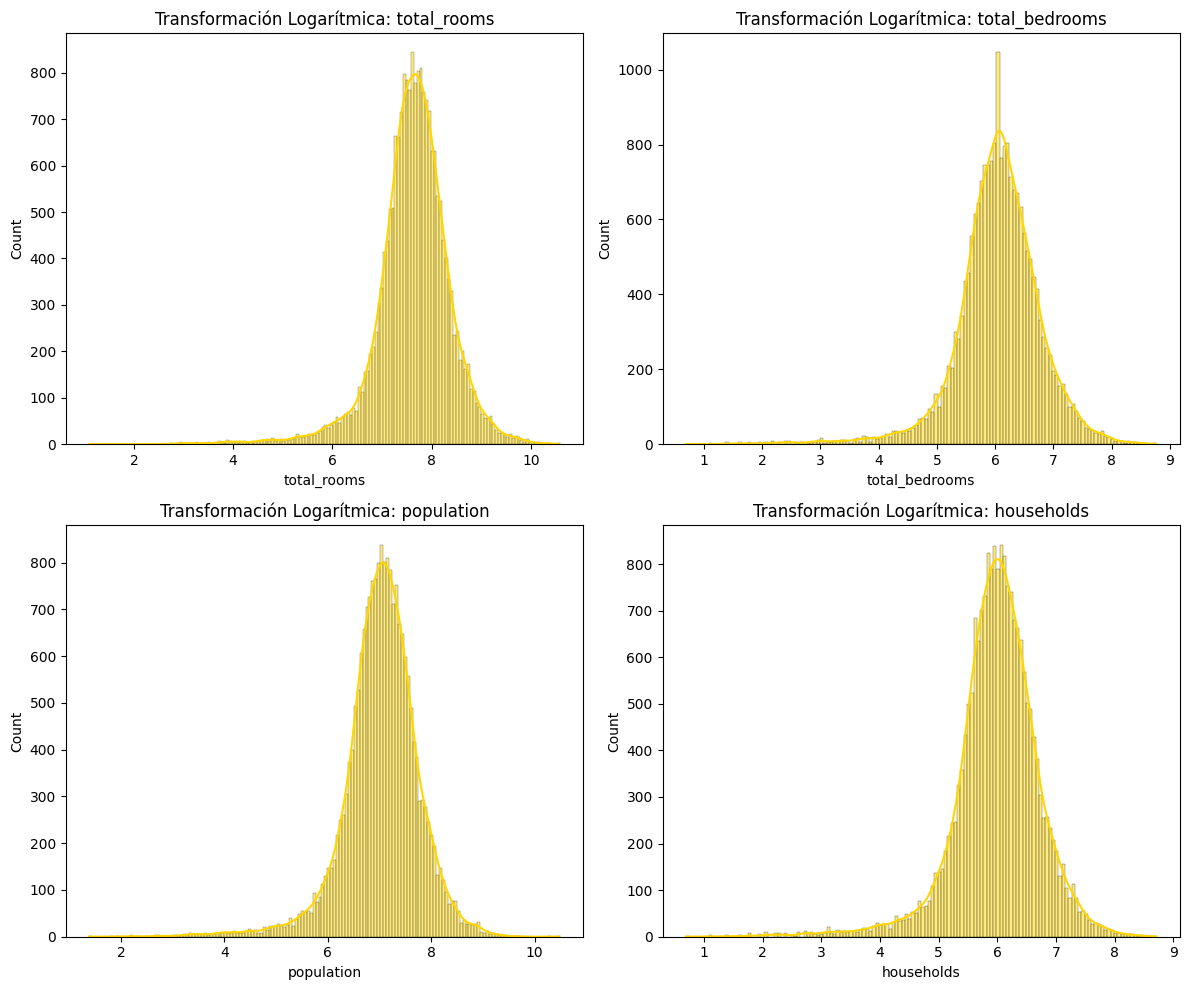

In [28]:
# 1. Definimos las columnas numéricas que queremos analizar
cols_num = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value",
]

# ---------------------------------------------------------
# PASO A: ESTADÍSTICA DESCRIPTIVA (La "Lupa" numérica)
# ---------------------------------------------------------
print("Resumen Estadístico:")
print(df_housing[cols_num].describe())

# ---------------------------------------------------------
# PASO B: DISTRIBUCIÓN ORIGINAL (Para ver el sesgo/colas largas)
# ---------------------------------------------------------
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flat

for i, col in enumerate(cols_num):
    sns.histplot(df_housing[col], ax=axes[i], kde=True, color="skyblue")
    axes[i].set_title(f"Distribución Original: {col}", fontsize=12)
    axes[i].set_xlabel("")

# Eliminamos el último espacio si sobra
if len(cols_num) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# PASO C: OUTLIERS Y ESCALAS (Boxplots)
# ---------------------------------------------------------
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flat

for i, col in enumerate(cols_num):
    sns.boxplot(x=df_housing[col], ax=axes[i], color="lightcoral")
    axes[i].set_title(f"Outliers en {col}", fontsize=12)
    axes[i].set_xlabel("")

if len(cols_num) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# PASO D: SOLUCIÓN A COLA LARGA (Transformación Logarítmica)
# ---------------------------------------------------------
# Analizamos solo las que detectamos con mucha "cola" en el Paso B
cols_log = ["total_rooms", "total_bedrooms", "population", "households"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flat

for i, col in enumerate(cols_log):
    # Aplicamos log1p (logaritmo de x+1 para evitar problemas con ceros)
    sns.histplot(np.log1p(df_housing[col]), ax=axes[i], kde=True, color="gold")
    axes[i].set_title(f"Transformación Logarítmica: {col}", fontsize=12)

plt.tight_layout()
plt.show()

### Univariate Analysis Based on the visualizations and statistical summaries, we can conclude the following:

1. Distribution and Skewness
Most features related to size and density (e.g., total_rooms, population, households) exhibit a significant right-skew (Long-tailed distribution). This means that while most districts are small or medium-sized, there are a few "megadistricts" that stretch the data.

Action Taken: A Logarithmic Transformation (log1p) was tested on these features, successfully normalizing the distributions and reducing the impact of extreme values.

2. Outlier Detection
The Boxplots reveal a high density of outliers, particularly in median_income and population.

Critical Observation: The median_house_value shows a suspicious "cap" or limit at 500,000. This suggests that values above this threshold were rounded down during data collection, which could introduce bias if not handled.

3. Scale Variance
There are massive differences in scales across features. For instance, median_income ranges from 0 to 15, while population goes into the thousands.

Future Strategy: To ensure the machine learning model treats all features equally, we must apply Feature Scaling (such as StandardScaler or MinMaxScaler) in the pre-processing phase.

## 5. Geographic Analysis (Spatial Patterns)
**Tasks**
- Analyze house values by latitude and longitude.
- Identify regional clusters of high and low prices.

**What to observe**
- Coastal vs inland price differences.
- Urban vs rural spatial patterns.

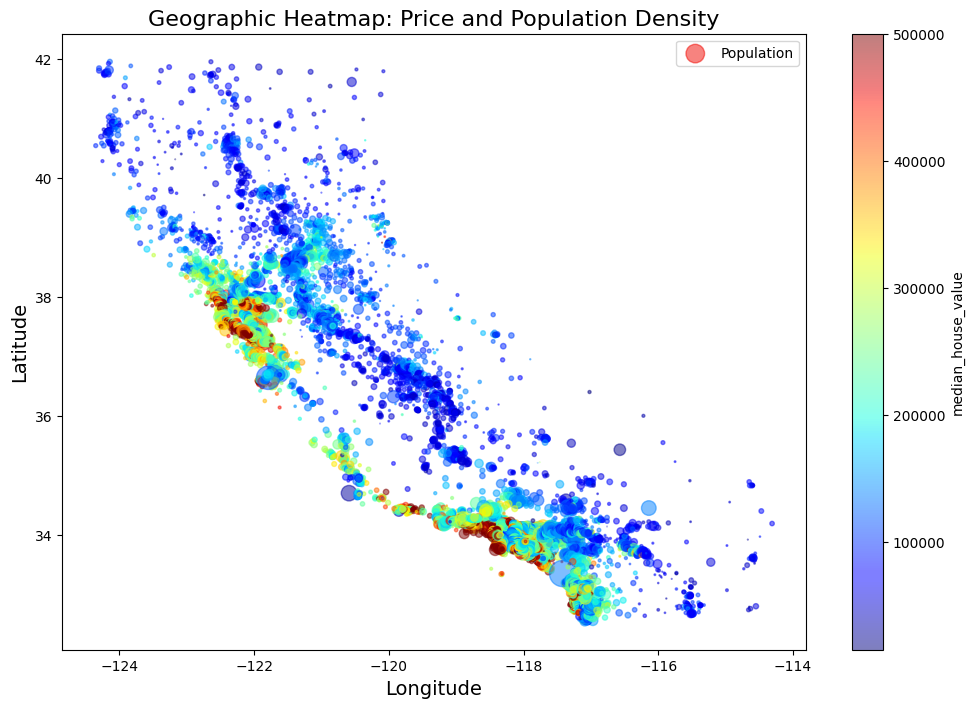

In [32]:
# Graph
df_housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    figsize=(12, 8),
    alpha=0.5,
    s=df_housing["population"] / 100,
    label="Population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

plt.title("Geographic Heatmap: Price and Population Density", fontsize=16)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend()
plt.show()

The geographical analysis reveals a clear spatial correlation between location and price. High-priced clusters are predominantly located along the coastline and within major metropolitan areas like Los Angeles and the Bay Area. In contrast, inland regions display lower prices and lower population density, suggesting that proximity to the ocean and urban centers are the most influential geographical factors for house valuation.

## 6. Categorical Feature Analysis: `ocean_proximity`
**Tasks**
- Analyze category frequencies.
- Compare house values across categories.

**What to observe**
- Which categories are associated with higher prices.
- Price variability within each category.


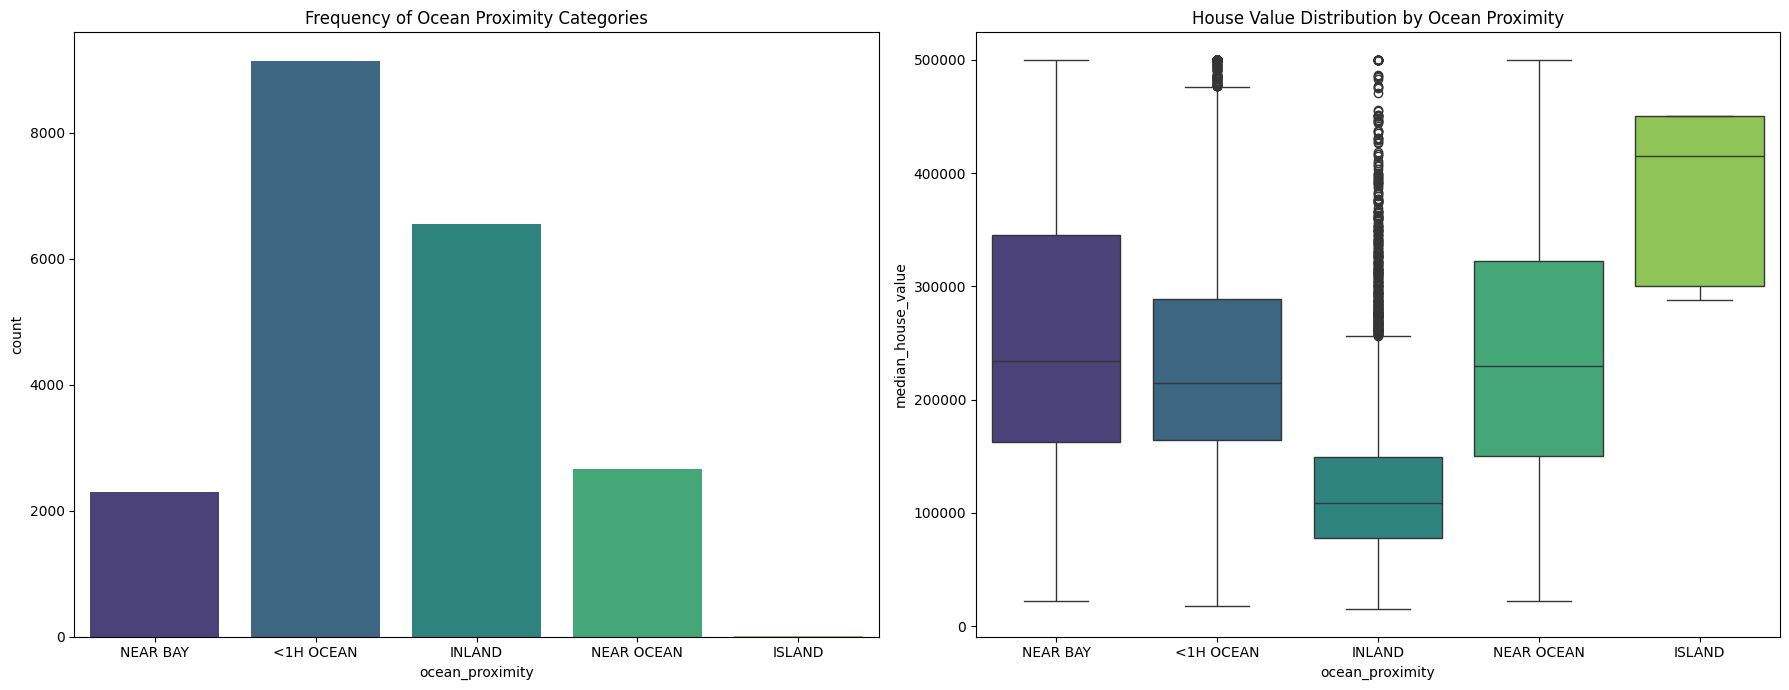

In [34]:

fig, axes = plt.subplots(1, 2, figsize=(18, 7))


sns.countplot(data=df_housing, x='ocean_proximity', hue='ocean_proximity', 
              ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Frequency of Ocean Proximity Categories')

sns.boxplot(data=df_housing, x='ocean_proximity', y='median_house_value', 
            hue='ocean_proximity', ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('House Value Distribution by Ocean Proximity')

plt.tight_layout()
plt.show()